# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score

import time
import csv

%matplotlib inline
plt.style.use('seaborn')

In [12]:
train_1_X=np.array([
    [0.,0.,0.,1.,0.,1.,0.,0.,0.],# 0 0 0 1 0 1 0 0 0 
    [0.,1.,0.,0.,0.,1.,0.,0.,0.],# 0 1 0 0 0 1 0 0 0
    [0.,1.,0.,1.,0.,0.,0.,0.,0.],# 0 1 0 1 0 0 0 0 0
    [1.,0.,0.,0.,0.,0.,0.,1.,0.],# 1 0 0 0 0 0 0 1 0  
    [1.,0.,1.,0.,0.,0.,0.,0.,0.],# 1 0 1 0 0 0 0 0 0 
    [0.,0.,0.,0.,1.,0.,0.,1.,0.],# 0 0 0 0 1 0 0 1 0 
    [0.,0.,0.,0.,0.,0.,1.,1.,0.],# 0 0 0 0 0 0 1 1 0 
    [0.,0.,1.,0.,0.,0.,0.,0.,1.],# 0 0 1 0 0 0 0 0 1
    [0.,0.,0.,0.,0.,0.,0.,1.,1.],# 0 0 0 0 0 0 0 1 1 
    [0.,0.,1.,0.,0.,0.,1.,0.,0.],# 0 0 1 0 0 0 1 0 0
    [0.,0.,1.,0.,1.,0.,0.,0.,0.] # 0 0 1 0 1 0 0 0 0 
])
train_1_y=np.array([1.,1.,1.,1.,0.,1.,0.,1.,0.,1.,0.])

test_1_X=np.array([
    [1.,0.,0.,0.,1.,0.,0.,0.,0.],
    [1.,0.,0.,0.,0.,0.,1.,0.,0.],
    [0.,0.,0.,0.,0.,0.,1.,0.,1.],
    [0.,0.,0.,0.,1.,0.,0.,0.,1.]
])

test_1_y=np.array([1.,0.,1.,0.])


train_2_X=np.array([
    [1.,0.,0.,0.,1.,0.],# 1 0 0 0 1 0
    [1.,1.,0.,0.,0.,0.],# 1 1 0 0 0 0
    [1.,1.,0.,0.,0.,0.],# 0 0 1 0 1 0
    [0.,0.,0.,1.,1.,0.],# 0 0 0 1 1 0
    [0.,1.,0.,0.,0.,1.],# 0 1 0 0 0 1
    [0.,0.,0.,0.,1.,1.],# 0 0 0 0 1 1
    [0.,1.,0.,1.,0.,0.],# 0 1 0 1 0 0
    [0.,1.,1.,0.,0.,0.] # 0 1 1 0 0 0 
])
train_2_y=np.array([1.,0.,1.,0.,1.,0.,1.,0.])

test_2_X=np.array([
    [1.,0.,1.,0.,0.,0.],# 1 0 1 0 0 0
    [1.,0.,0.,1.,0.,0.],# 1 0 0 1 0 0 
    [0.,0.,0.,1.,0.,1.],# 0 0 0 1 0 1
    [0.,0.,1.,0.,0.,1.],# 0 0 1 0 0 1
])

test_2_y=np.array([1.,0.,1.,0.])



In [ ]:
mlp = MLPClassifier(#MLPClassifier #MLPRegressor
    activation='logistic',
    solver='sgd',
    learning_rate='adaptive',# experiment sets constant to 0.3 # I rather prefer adaptive (the other option: invscaling)
    learning_rate_init=0.3,
    momentum=0,
    max_iter=200000,
    validation_fraction=0,
    verbose=True,
    tol=1e-10,
    hidden_layer_sizes=(4)
)
mlp.fit(train_1_X,train_1_y)

In [14]:
pd.DataFrame(np.column_stack([train_1_y,mlp.predict(train_1_X).round(2)]), columns=("train","predict"))


,train,predict
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


In [15]:
pd.DataFrame(np.column_stack([test_1_y,mlp.predict(test_1_X).round(2)]), columns=("test","predict"))

,test,predict
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0


In [ ]:
mlp_2 = MLPClassifier(#MLPClassifier #MLPRegressor
    activation='logistic',
    solver='sgd',
    learning_rate='adaptive',# experiment sets constant to 0.3 # I rather prefer adaptive (the other option: invscaling)
    learning_rate_init=0.3,
    momentum=0,
    max_iter=200000,
    validation_fraction=0,
    verbose=True,
    tol=1e-12,
    hidden_layer_sizes=(4)
)
mlp_2.fit(train_2_X,train_2_y)

In [17]:
pd.DataFrame(np.column_stack([train_2_y,mlp_2.predict(train_2_X).round(2)]), columns=("train","predict"))

,train,predict
0,1.0,1.0
1,0.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0


In [18]:
pd.DataFrame(np.column_stack([test_2_y,mlp_2.predict(test_2_X).round(2)]), columns=("test","predict"))

,test,predict
0,1.0,0.0
1,0.0,1.0
2,1.0,1.0
3,0.0,0.0


# Replica Iterations

In [19]:
(13*60)/4

195.0

In [ ]:
iteraciones=100000
#n_reports=20

loss_train_1=[]
n_iter_train_1=[]
predict_train_1=[]
predict_test_1=[]

loss_train_2=[]
n_iter_train_2=[]
predict_train_2=[]
predict_test_2=[]

converg_times=[]

filename="test"
# with open(''.join(["Results_1/",filename,".csv"]), 'wb') as f:# 'wb' are the second parameter sugested values
#     writer = csv.writer(f)
#     writer.writerow([
#         "exp_1_loss",
#         "exp_1_n_iter",
#         "exp_1_pred_train_1",
#         "exp_1_pred_train_2",
#         "exp_1_pred_train_3",
#         "exp_1_pred_train_4",
#         "exp_1_pred_train_5",
#         "exp_1_pred_train_6",
#         "exp_1_pred_train_7",
#         "exp_1_pred_train_8",
#         "exp_1_pred_train_9",
#         "exp_1_pred_train_10",
#         "exp_1_pred_train_11",
#         "exp_1_pred_test_1",
#         "exp_1_pred_test_2",
#         "exp_1_pred_test_3",
#         "exp_1_pred_test_4",
#         "exp_2_loss",
#         "exp_2_n_iter",
#         "exp_2_pred_train_1",
#         "exp_2_pred_train_2",
#         "exp_2_pred_train_3",
#         "exp_2_pred_train_4",
#         "exp_2_pred_train_5",
#         "exp_2_pred_train_6",
#         "exp_2_pred_train_7",
#         "exp_2_pred_train_8",
#         "exp_2_pred_test_1",
#         "exp_2_pred_test_2",
#         "exp_2_pred_test_3",
#         "exp_2_pred_test_4",
#     ])
        
        
for corrida in range(iteraciones):
    strt_time=time.time()
    mlp_1 = MLPRegressor(#MLPClassifier #MLPRegressor
        activation='logistic',
        solver='sgd',
        learning_rate='adaptive',# experiment sets constant to 0.3 # I rather prefer adaptive (the other option: invscaling)
        learning_rate_init=1,
        momentum=0,
        max_iter=200000,
        validation_fraction=0,
        #verbose=True,
        tol=1e-10,
        hidden_layer_sizes=(4)
    )
    
    mlp_1.fit(train_1_X,train_1_y)
#     predict_train_1.append(mlp_1.predict(train_1_X))
#     predict_test_1.append (mlp_1.predict(test_1_X))
#     n_iter_train_1.append(mlp_1.n_iter_)
#     loss_train_1.append(mlp_1.loss_)
#     iter_vals_1=[item for sublist in [[mlp_1.loss_],
#                           [mlp_1.n_iter_],
#                           list(mlp_1.predict(train_1_X)),
#                           list(mlp_1.predict(test_1_X))
#                          ] for item in sublist]

    mlp_2 = MLPRegressor(#MLPClassifier #MLPRegressor
        activation='logistic',
        solver='sgd',
        learning_rate='adaptive',# experiment sets constant to 0.3 # I rather prefer adaptive (the other option: invscaling)
        learning_rate_init=1,
        momentum=0,
        max_iter=200000,
        validation_fraction=0,
        #verbose=True,
        tol=1e-10,
        hidden_layer_sizes=(4)
    )
    
    mlp_2.fit(train_2_X,train_2_y)
#     predict_train_2.append(mlp_2.predict(train_2_X))
#     predict_test_2.append (mlp_2.predict(test_2_X))
#     n_iter_train_2.append(mlp_2.n_iter_)
#     loss_train_2.append(mlp_2.loss_)
#     iter_vals_2=[item for sublist in [[mlp_2.loss_],
#                           [mlp_2.n_iter_],
#                           list(mlp_2.predict(train_2_X)),
#                           list(mlp_2.predict(test_2_X))
#                          ] for item in sublist]

    iter_vals=[item for sublist in [[mlp_1.loss_],
                                    [mlp_1.n_iter_],
                                    list(mlp_1.predict(train_1_X)),
                                    list(mlp_1.predict(test_1_X)),
                                    [mlp_2.loss_],
                                    [mlp_2.n_iter_],
                                    list(mlp_2.predict(train_2_X)),
                                    list(mlp_2.predict(test_2_X))
                                   ] for item in sublist]

    end_time=time.time()
#     converg_times.append(end_time-strt_time)

    with open(''.join(["Results_1/",filename,".csv"]), 'a') as f:# 'wb' are the second parameter sugested values
        writer = csv.writer(f)
        writer.writerow(iter_vals)
    print("iter: ", str(corrida), "| time: ", str(end_time-strt_time))


#     if i %(iteraciones/n_reports)==0:
#         np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))
#         with open("Results_1/PSO_best_part.csv", 'wb') as f:
#             writer = csv.writer(f)
#             [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

# np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))

In [ ]:
dat=pd.read_csv("Results_1/test.csv")# , sep=";" # para bases en español
list(dat.columns)

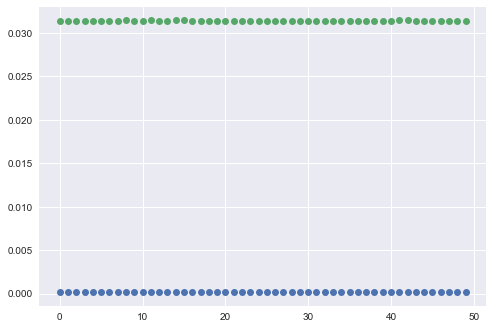

In [12]:
plt.plot(loss_train_1, "o")
plt.plot(loss_train_2, "o")
plt.show()

In [19]:
dat=pd.read_csv("Results_1/test_b.csv")
list(dat.columns)

['exp_1_loss',
 'exp_1_n_iter',
 'exp_1_pred_train_1',
 'exp_1_pred_train_2',
 'exp_1_pred_train_3',
 'exp_1_pred_train_4',
 'exp_1_pred_train_5',
 'exp_1_pred_train_6',
 'exp_1_pred_train_7',
 'exp_1_pred_train_8',
 'exp_1_pred_train_9',
 'exp_1_pred_train_10',
 'exp_1_pred_train_11',
 'exp_1_pred_test_1',
 'exp_1_pred_test_2',
 'exp_1_pred_test_3',
 'exp_1_pred_test_4',
 'exp_2_loss',
 'exp_2_n_iter',
 'exp_2_pred_train_1',
 'exp_2_pred_train_2',
 'exp_2_pred_train_3',
 'exp_2_pred_train_4',
 'exp_2_pred_train_5',
 'exp_2_pred_train_6',
 'exp_2_pred_train_7',
 'exp_2_pred_train_8',
 'exp_2_pred_test_1',
 'exp_2_pred_test_2',
 'exp_2_pred_test_3',
 'exp_2_pred_test_4']

In [15]:
n=3.

for i in xrange(10):
    n=n/5
    print (n)

0.6
0.12
0.024
0.0048
0.00096
0.000192
3.84e-05
7.68e-06
1.536e-06
3.072e-07


In [ ]:
plt.plot(loss_train_2)

In [ ]:
plt.hist(np.array(predict_test_1))

In [ ]:
plt.hist(np.array(predict_test_2))

# Clasifiers Comparison

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score

%matplotlib inline
plt.style.use('seaborn')

In [ ]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
    "Gaussian Process",
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, tol=1e-12, learning_rate='adaptive',hidden_layer_sizes=(4)),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
avg_scores_train=[]
avg_scores_test=[]
#train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=clf.fit(train_1_X, train_1_y)
    #train_clasif.append(clasif)
    scr=average_precision_score(train_1_y,clasif.predict(train_1_X))
    avg_scores_train.append(scr)
    scr_test=average_precision_score(test_1_y,clasif.predict(test_1_X))
    avg_scores_test.append(scr_test)

    print(name,scr,scr_test)

In [ ]:
avg_scores_train_2=[]
avg_scores_test_2=[]
#train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=clf.fit(train_2_X, train_2_y)
    #train_clasif.append(clasif)
    scr=average_precision_score(train_2_y,clasif.predict(train_2_X))
    avg_scores_train.append(scr)
    scr_test=average_precision_score(test_2_y,clasif.predict(test_2_X))
    avg_scores_test.append(scr_test)

    print(name,scr,scr_test)